In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_claim=pd.read_csv("Auto_Insurance_Claims_amount.csv")

In [3]:
df=pd.DataFrame(data=insurance_claim)

In [4]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df["State"].unique()

array(['Kansas', 'Nebraska', 'Oklahoma', 'Missouri', 'Iowa'], dtype=object)

In [6]:
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
df.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [8]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
df.shape

(9134, 26)

In [10]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [11]:
df_new=pd.get_dummies(df,columns=['Country','State','Response','Coverage','Education','Effective To Date','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size'])
      
    
       


In [12]:
df_new.head()

,Customer,State Code,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,KS,276.351928,56274,69,32,5,0,1,384.811147,...,0,0,0,0,0,0,1,0,1,0
1,QZ44356,NE,697.953590,0,94,13,42,0,8,1131.464935,...,0,1,0,0,0,0,0,0,1,0
2,AI49188,OK,1288.743165,48767,108,18,38,0,2,566.472247,...,0,0,0,0,0,0,1,0,1,0
3,WW63253,MO,764.586183,0,106,18,65,0,7,529.881344,...,0,0,0,0,1,0,0,0,1,0
4,HB64268,KS,281.369258,43836,73,12,44,0,1,138.130879,...,0,1,0,0,0,0,0,0,1,0


In [13]:
df=df_new.drop(["Customer","State Code","Total Claim Amount","Country_US"],axis=1)

In [14]:
df.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_Iowa,State_Kansas,State_Missouri,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,276.351928,56274,69,32,5,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,697.953590,0,94,13,42,0,8,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1288.743165,48767,108,18,38,0,2,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,764.586183,0,106,18,65,0,7,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,281.369258,43836,73,12,44,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [15]:
df

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_Iowa,State_Kansas,State_Missouri,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,276.351928,56274,69,32,5,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,697.953590,0,94,13,42,0,8,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1288.743165,48767,108,18,38,0,2,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,764.586183,0,106,18,65,0,7,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,281.369258,43836,73,12,44,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5,825.629780,62902,69,14,94,0,2,1,0,0,...,1,0,0,0,0,0,1,0,1,0
6,538.089864,55350,67,0,13,0,9,1,0,0,...,0,1,0,0,0,0,0,0,1,0
7,721.610031,0,101,0,68,0,4,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8,2412.750402,14072,71,13,3,0,2,1,0,0,...,0,1,0,0,0,0,0,0,1,0
9,738.817808,28812,93,17,7,0,8,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [16]:
df.shape

(9134, 123)

In [17]:
y=df.iloc[:,0].values

In [18]:
y

array([ 276.3519279,  697.9535903, 1288.743165 , ...,  816.3890428,
        752.4442436,  261.1836866])

In [19]:
x=df.iloc[:,1:-1]

In [20]:
x.values

array([[56274,    69,    32, ...,     1,     0,     1],
       [    0,    94,    13, ...,     0,     0,     1],
       [48767,   108,    18, ...,     1,     0,     1],
       ...,
       [    0,    85,     9, ...,     0,     0,     1],
       [21941,    96,    34, ...,     0,     1,     0],
       [    0,    77,     3, ...,     1,     0,     1]], dtype=int64)

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x=sc.fit_transform(x)


In [23]:
y=y.reshape(-1,1)

In [24]:
y=sc.fit_transform(y)

In [25]:
y

array([[-0.76287773],
       [-0.14924546],
       [ 0.71063622],
       ...,
       [ 0.02313483],
       [-0.06993547],
       [-0.78495478]])

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=50)

In [28]:
from sklearn.metrics import mean_squared_error
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7124, 121)
(2010, 121)
(7124, 1)
(2010, 1)


In [29]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.coef_

array([[-1.59529453e-02,  3.34139879e-01,  2.88002415e-03,
        -2.17933456e-02, -5.02991238e-02,  3.04246896e-02,
         1.29016097e+13,  8.07230742e+12,  1.35884044e+13,
         1.11339265e+13,  8.44367087e+12,  1.36996233e+13,
         1.36996233e+13,  5.14985472e+12,  4.83845608e+12,
         3.02425782e+12,  5.22688241e+12,  5.18978239e+12,
         2.16359915e+12,  5.15576897e+12,  3.11162767e+12,
        -8.01496586e+11, -9.17591510e+11, -8.47987511e+11,
        -7.40435229e+11, -7.93464139e+11, -8.12074609e+11,
        -8.14696172e+11, -7.85344006e+11, -8.82332771e+11,
        -8.17308736e+11, -8.79927565e+11, -8.32799846e+11,
        -8.65344230e+11, -8.32799846e+11, -7.68829539e+11,
        -8.19912386e+11, -7.98828683e+11, -8.09443958e+11,
        -8.84730892e+11, -9.15286879e+11, -8.55472615e+11,
        -8.32799846e+11, -8.77515216e+11, -7.93464139e+11,
        -8.77515216e+11, -7.07808422e+11, -8.50490433e+11,
        -7.88060627e+11, -8.09443958e+11, -8.04155038e+1

In [30]:
lm.score(x_train,y_train)

0.17295098879623005

In [32]:
from sklearn.decomposition import PCA
pca=PCA()
Xreg = pca.fit_transform(x)

In [39]:
def linreg():
    lm.fit(Xreg,y)
    pred=lm.predict(Xreg)
    print(lm.score(Xreg,y))
    print(r2_score(y,pred))
    print(mean_squared_error(y,pred))

In [40]:
linreg()

0.17665261223408524
0.17665261223408524
0.8233473877659148


In [41]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [44]:

Score=cross_val_score(lm,Xreg,y,cv=5)

In [45]:
print(Score)

[0.12201606 0.14364334 0.1687661  0.15194603 0.13686821]


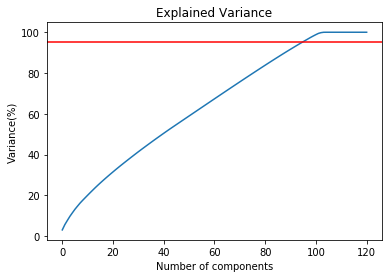

In [50]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('Variance(%)')
plt.title("Explained Variance")
plt.axhline(y=95,color='r')
plt.show()

In [52]:
x_new=PCA(85).fit_transform(x)

In [53]:
x_new.shape

(9134, 85)

In [54]:
def lin_reg():
    lm.fit(x_new,y)
    pred=lm.predict(x_new)
    print(lm.score(x_new,y))
    print(r2_score(y,pred))
    print(mean_squared_error(y,pred))

In [55]:
lin_reg()

0.17048811697819355
0.17048811697819355
0.8295118830218065


In [56]:

Score=cross_val_score(lm,x_new,y,cv=5)

In [58]:
Score

array([0.12220847, 0.14045757, 0.1786612 , 0.15568881, 0.13017035])

In [59]:
from sklearn.externals import joblib
joblib.dump(lm,"lmsave")

['lmsave']

In [60]:
import pickle
s=pickle.dumps(lm)
clf2=pickle.loads(s)

In [61]:
clf2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)